# Enter Local Address:
#### The Spotify_API notebook will export the json file(s) to the address 

#### The Spotify_playlist_analysis notebook will import these json file(s) and perform the analysis

In [2]:
local_address = input('Enter local adress: ')

Enter local adress:  C:\Users\anhqu\OneDrive\Desktop\QAs\QA github folder\


# Note: 
#### If you already have the playlist json file(s), skip to the Spotify_playlist_analysis script

# Enter Spotify API Credentials

In [ ]:
user_spotify_name = input('Enter spotify name: ')
user_spotify_id = input('Enter spotify id: ')
client_id = input('Enter your client ID number: ')
client_secret = input('Enter your client secret number: ')
scope = input('Enter scope: ')

# Run the Spotify_API notebook

## Note: 
- User can create multiple json file(s)
- The playlist should have less than 100 tracks due to Spotify API limit. If the original playlist has >100 tracks, split it into smaller playlists
- This step takes a long time

In [ ]:
stop_creating_json = ''

while stop_creating_json !='y':
    %run ./Spotify_API.ipynb
    stop_creating_json = input('Enter y to stop creating more json file. Otherwise enter anything: ')
    print('\n')

# Run the Spotify_Playlist_Analysis notebook

###### Note: User can import multiple json file(s) to the track pool

Enter file name without .json:  anhquocduong611_Progressive_House_Mau5trap_playlist_data




Number of track imported from playlist: 43


Enter y to stop importing. Otherwise enter anything:  y




Total Number of Track in Track pool: 43
Green line is average line
Red line is median line
<module 'matplotlib.pyplot' from 'C:\\Users\\anhqu\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


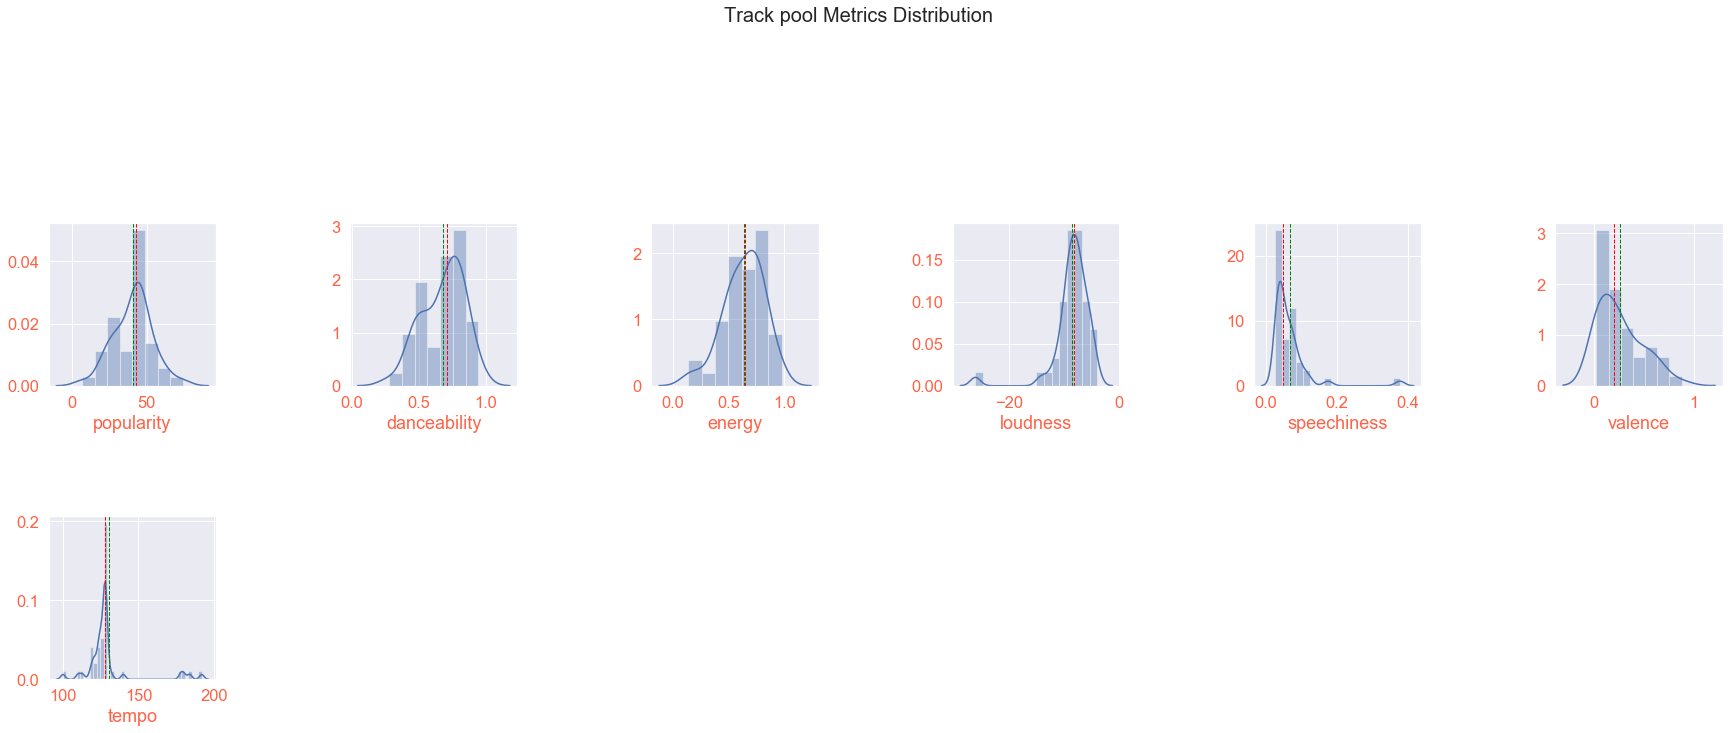

<module 'matplotlib.pyplot' from 'C:\\Users\\anhqu\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


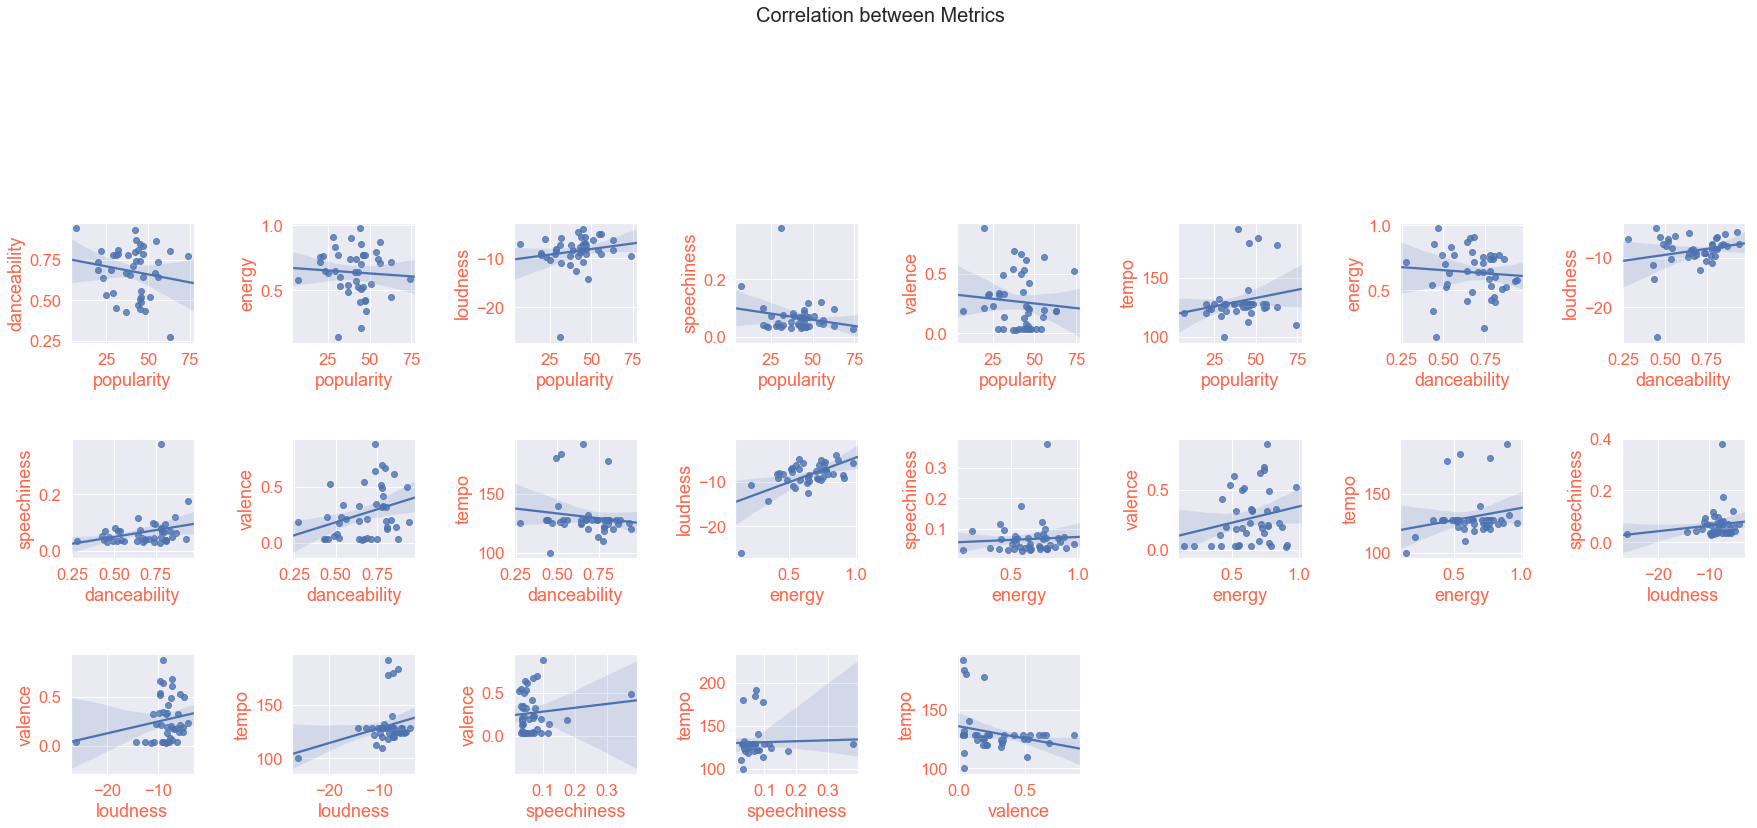

Enter set time:  90


[[0, 'Strobe'], [1, 'I Remember - Vocal Mix'], [2, 'Right This Second'], [3, 'The Veldt - 8 Minute Edit'], [4, 'Dead End Thrills - Extended Mix'], [5, 'Faxing Berlin'], [6, 'Taj'], [7, 'As I Sleep (feat. Charlee) [Gramercy Remix]'], [8, "Beneath with Me (feat. Skylar Grey) - Kaskade's V.4"], [9, 'LAX to JFK'], [10, 'Opus'], [11, 'The 16th Hour'], [12, '4ware'], [13, 'Us'], [14, 'Plucking Technology'], [15, 'Whelk Then'], [16, 'Instant Crush'], [17, 'Let Go - Extended Edit'], [18, 'Constellations'], [19, 'bad at titles'], [20, 'Polaris'], [21, 'Dreams'], [22, 'Move for Me'], [23, "Doin' it Right"], [24, 'Hang Up Your Hang Ups (The Only One) [feat. Kim English] - CamelPhat Remix, Edit'], [25, 'They Are Not Like You'], [26, "I'll Never Dream I'm in Love - Radio Edit"], [27, 'Cocktail Queen - Original Mix'], [28, 'Imaginary Friends'], [29, 'Ryat'], [30, 'Three Pound Chicken Wing'], [31, 'Raise Your Weapon'], [32, 'Some Chords'], [33, 'Hi Friend!'], [34, 'Lack of a Better Name'], [35, 'Sond

Enter first track:  33


Playlist total length: 
('4:35:6', 275.12)
Previous track: Hi Friend!
Next track: 4ware
Similarity score: 17.34
Next track index: 12


Previous track: 4ware
Next track: Right This Second
Similarity score: 29.62
Next track index: 2


Previous track: Right This Second
Next track: Dreams
Similarity score: 23.85
Next track index: 21


Previous track: Dreams
Next track: Imaginary Friends
Similarity score: 44.14
Next track index: 28


Previous track: Imaginary Friends
Next track: Raise Your Weapon
Similarity score: 174.45
Next track index: 31


Previous track: Raise Your Weapon
Next track: Psyopia - Bassnectar Remix
Similarity score: 13.27
Next track index: 37


Previous track: Psyopia - Bassnectar Remix
Next track: The 16th Hour
Similarity score: 2.3
Next track index: 11


Previous track: The 16th Hour
Next track: Polaris
Similarity score: 27.54
Next track index: 20


Previous track: Polaris
Next track: bad at titles
Similarity score: 11.05
Next track index: 19


Previous track: bad at titl

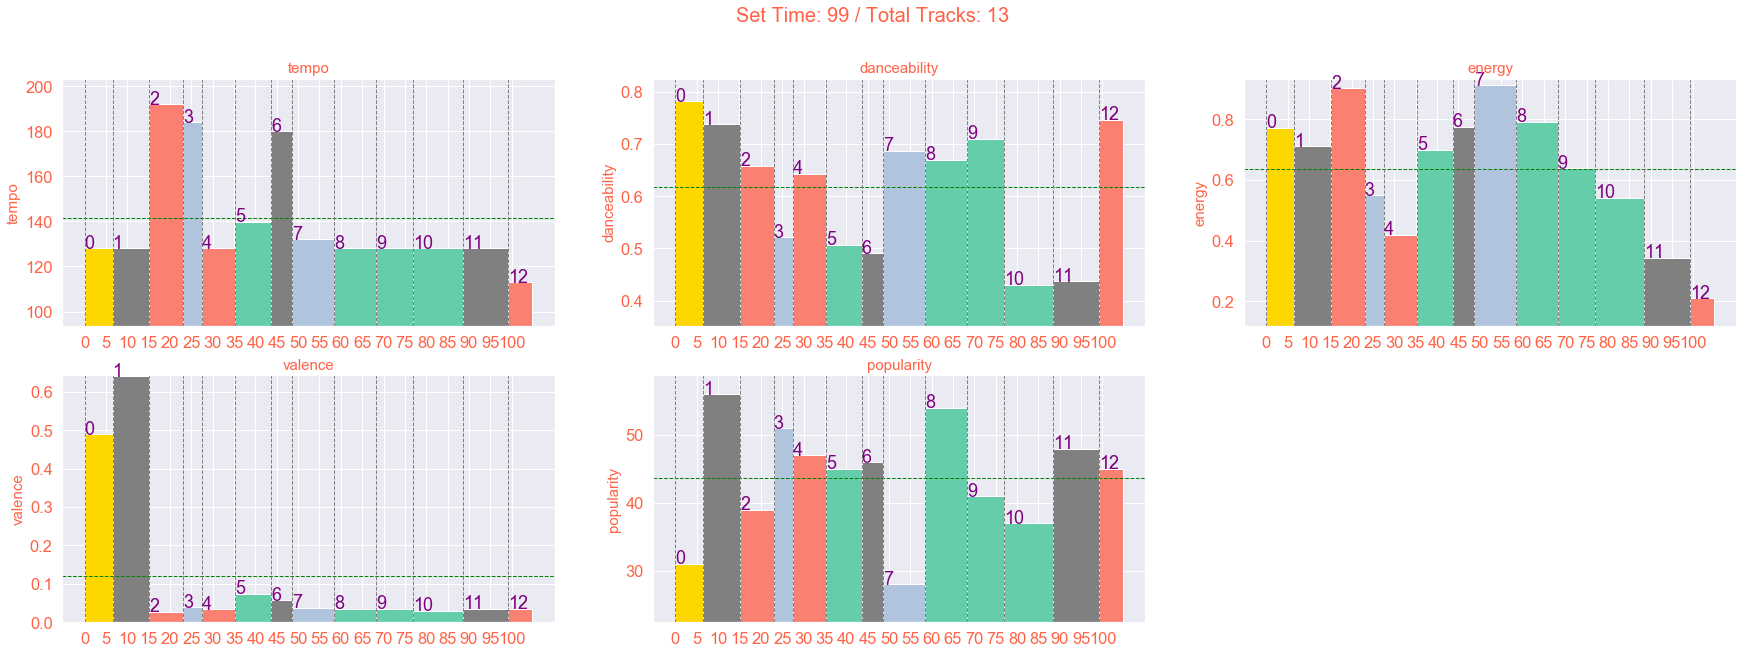

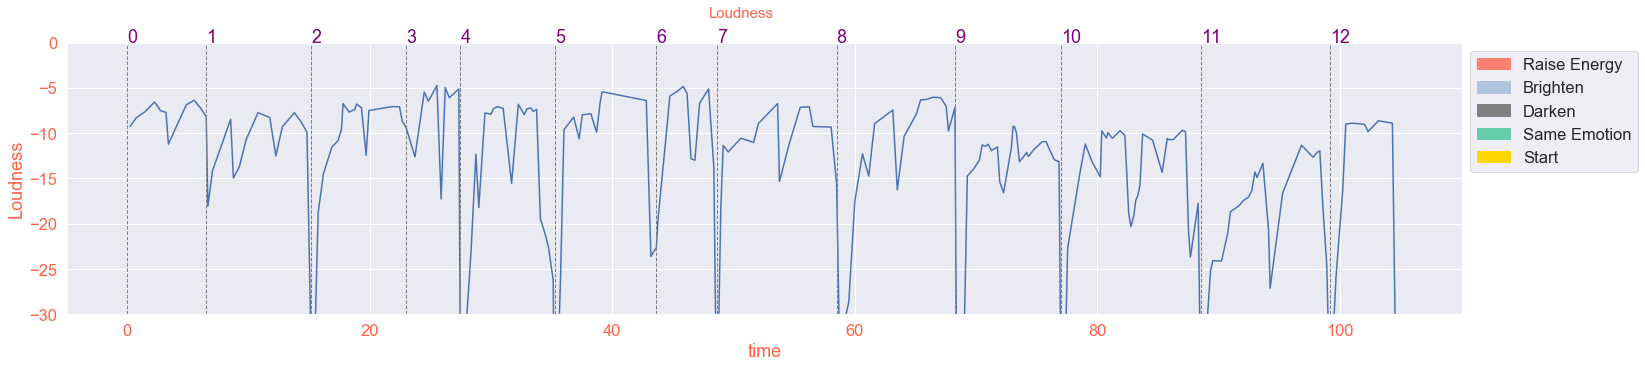

In [7]:
%run ./Spotify_playlist_analysis.ipynb

# Create a Spotify Playlist

In [8]:
import spotipy
import spotipy.util as util

### Because of the scope change, user needs to re-enter API credentials
##### Note: enter scope as playlist-modify-public 

In [21]:
user_spotify_name = input('Enter spotify name: ')
user_spotify_id = input('Enter spotify id: ')
client_id = input('Enter your client ID number: ')
client_secret = input('Enter your client secret number: ')
scope = 'playlist-modify-private'

Enter spotify name:  anhquocduong611
Enter spotify id:  1214868237
Enter your client ID number:  6efd3e7d946d45b2ae1c1cd274dd8a51
Enter your client secret number:  a424e3ab68364de18e90295467dafb7c


In [22]:
USERNAME = sys.argv[1] 
CLIENT_ID = client_id # Go to Spotify App Developer Dashboard
CLIENT_SECRET = client_secret # Go to Spotify App Developer Dashboard
REDIRECT_URI = 'http://google.com/' # Set it as 'http://google.com/'
SCOPE = scope # will give user to modify

### Functions

In [24]:
def run_spotify_api():
    try:
        token = util.prompt_for_user_token(username = USERNAME, 
                                       scope = SCOPE, 
                                       client_id = CLIENT_ID, 
                                       client_secret = CLIENT_SECRET, 
                                       redirect_uri = REDIRECT_URI)
    except:
        os.remove(f".cache~{username}")
        token = util.prompt_for_user_token(username = USERNAME, 
                                       scope = SCOPE, 
                                       client_id = CLIENT_ID, 
                                       client_secret = CLIENT_SECRET, 
                                       redirect_uri = REDIRECT_URI)
    sp = spotipy.Spotify(auth=token)
    return sp

In [25]:
sp = run_spotify_api()



            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opened https://accounts.spotify.com/authorize?client_id=6efd3e7d946d45b2ae1c1cd274dd8a51&response_type=code&redirect_uri=http%3A%2F%2Fgoogle.com%2F&scope=playlist-modify-private in your browser




Enter the URL you were redirected to:  https://www.google.com/?code=AQBbAQM8ifQ7TS9VRrZFQYXuA-fSDUr5hx0N9USDl1LIH2tmr3WTzmblHFglBe9FSntd0ngILRr19iUf_iMI77WHfG3sTq3GDrCBgj--DT9S68nc_BWEQcXE0obgJgVvDDuvFSNX8rzcSSNHF4vBgj8zzZ-52OxfevkvM-fsgkmC_kEjG04afkosTzrLtEP9ORU1hrONHcMcJ6SG6qR2qUvndg


###### Get Playlist Info

In [26]:
# Function to show track
def show_tracks(tracks):
    track_list = []
    for i, item in enumerate(tracks['items']):
        track = item['track']
        track_list.append((i, track['artists'][0]['name'], track['name'], track['album']['name']))
    return track_list

In [27]:
def run_spotify_get_playlist_tracks(playlist_id):
    # Get playlist from Spotify API
    playlist = sp.user_playlist(user_spotify_id, playlist_id)
    print(playlist['name'])
    print('Total tracks', playlist['tracks']['total'])

    tracks = playlist['tracks']
    my_playlist = show_tracks(tracks)
    while tracks['next']:
        tracks = sp.next(tracks)
        my_playlist = show_tracks(tracks)
    
    # Convert from tuple to list
    for i in range(len(my_playlist)):
        my_playlist[i] = list(my_playlist[i])

    # Remove character ' in the track data
    for i in range(len(my_playlist)):
        for y in range(1,3):
            my_playlist[i][y] = my_playlist[i][y].replace("'","")
    return my_playlist

### Run the Functions

In [28]:
playlist_name = input('Enter new playlist name: ')

create_new_playlist = sp.user_playlist_create(user=user_spotify_id,
                                               name=playlist_name,
                                               public=False)

new_playlist_id = create_new_playlist['uri'][17:]
print('Playlist id: ')
print(new_playlist_id)

add_tracks = sp.user_playlist_add_tracks(user=user_spotify_id, playlist_id = new_playlist_id, tracks=set_track_id)

Enter new playlist name:  QA_deadmau5_mix


Playlist id: 
2MYlln24MT3xaUeC8ewe1h


# Visit my Spotify playlist to check out the set mix :)